# Importing Libraries

In [1]:
import pandas as pd
import io
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('model.csv')
df.head()

,timestamp,app_name,min,max,average,cpu,diskfree,memory
0,2023-01-30T05:56:23.337850587Z,admin.Indium,1.914,3.786,2.802265,70.5,36.77,3.626398e+09
1,2023-01-30T05:56:24.963641773Z,admin.Indium,1.914,3.786,2.802265,70.5,36.77,3.626398e+09
2,2023-01-30T05:56:27.948262513Z,admin.Indium,1.914,3.786,2.802265,70.5,36.77,3.626398e+09
3,2023-01-30T05:56:30.932110926Z,admin.Indium,1.914,3.786,2.802265,70.5,36.77,3.626398e+09
4,2023-01-30T05:56:33.941538483Z,admin.Indium,0.818,2.255,1.507328,86.7,36.75,1.772482e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  2058 non-null   object 
 1   app_name   2057 non-null   object 
 2   min        2057 non-null   float64
 3   max        2057 non-null   float64
 4   average    2057 non-null   float64
 5   cpu        2057 non-null   float64
 6   diskfree   2057 non-null   float64
 7   memory     2057 non-null   float64
dtypes: float64(6), object(2)
memory usage: 128.8+ KB


In [4]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (2058, 8)


In [5]:
column = df['cpu']

In [6]:
unique_column = column.drop_duplicates()

In [7]:
# view dataframe summary

max_value = unique_column.max()

In [8]:
print(max_value)

144.1


In [9]:
df.cpu.mean()


91.00315994166263

In [10]:
df["average"].mean()

7.865928529495125

In [11]:
df['memory'].max() 

3791214448.0

In [12]:
import numpy as np

conditions = [(df['max'] > 7) | (df['cpu'] > 91) | (df['memory'] > round(3791214448.0))]

values = [1]

df['condition'] = np.select(conditions, values)

In [13]:
df.head()

,timestamp,app_name,min,max,average,cpu,diskfree,memory,condition
0,2023-01-30T05:56:23.337850587Z,admin.Indium,1.914,3.786,2.802265,70.5,36.77,3.626398e+09,0
1,2023-01-30T05:56:24.963641773Z,admin.Indium,1.914,3.786,2.802265,70.5,36.77,3.626398e+09,0
2,2023-01-30T05:56:27.948262513Z,admin.Indium,1.914,3.786,2.802265,70.5,36.77,3.626398e+09,0
3,2023-01-30T05:56:30.932110926Z,admin.Indium,1.914,3.786,2.802265,70.5,36.77,3.626398e+09,0
4,2023-01-30T05:56:33.941538483Z,admin.Indium,0.818,2.255,1.507328,86.7,36.75,1.772482e+09,0


In [14]:
df.isna().sum()

timestamp    0
app_name     1
min          1
max          1
average      1
cpu          1
diskfree     1
memory       1
condition    0
dtype: int64

In [15]:
# drop the row with the missing values
df.dropna(how="any",inplace = True)
df.shape

(2057, 9)

In [16]:
df.isna().sum()

timestamp    0
app_name     0
min          0
max          0
average      0
cpu          0
diskfree     0
memory       0
condition    0
dtype: int64

In [17]:
df = df.drop(['timestamp','app_name'],axis=1)

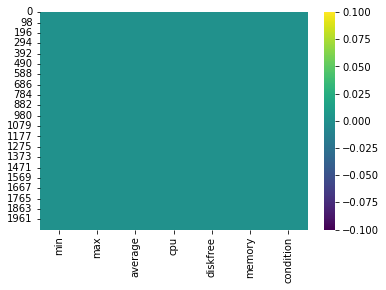

In [18]:
import seaborn as sns
sns.heatmap(df.isnull(),cmap='viridis');

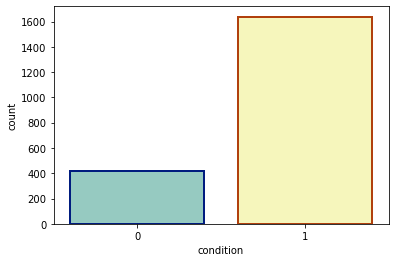

In [19]:
sns.countplot(df['condition'],edgecolor=sns.color_palette('dark',3),linewidth=2,palette="Set3");

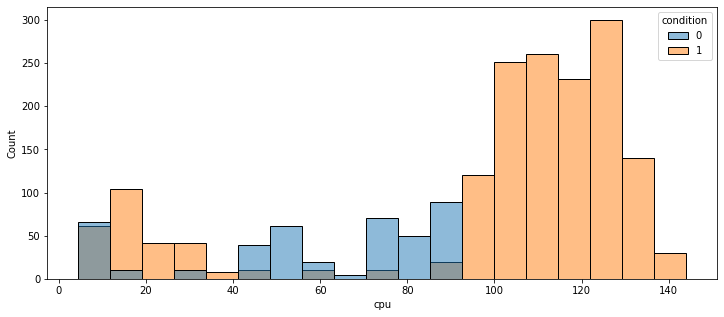

In [20]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,5))
sns.histplot(x='cpu',hue='condition',data=df);

## Transforming the data

In [21]:
##Non numeric into numerical cols

from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [22]:
df.head()

,min,max,average,cpu,diskfree,memory,condition
0,1.914,3.786,2.802265,70.5,36.77,3.626398e+09,0
1,1.914,3.786,2.802265,70.5,36.77,3.626398e+09,0
2,1.914,3.786,2.802265,70.5,36.77,3.626398e+09,0
3,1.914,3.786,2.802265,70.5,36.77,3.626398e+09,0
4,0.818,2.255,1.507328,86.7,36.75,1.772482e+09,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2057
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   min        2057 non-null   float64
 1   max        2057 non-null   float64
 2   average    2057 non-null   float64
 3   cpu        2057 non-null   float64
 4   diskfree   2057 non-null   float64
 5   memory     2057 non-null   float64
 6   condition  2057 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 128.6 KB


## spliting the data

In [24]:
X = df.drop('condition',axis=1)
Y = df['condition']

In [25]:
X.shape

(2057, 6)

In [26]:
Y.shape

(2057,)

In [27]:
##Split the data into 75% in training and 25% in Testing

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 0)

# Model Selection

In [28]:
#Logistic Regression

log_model = LogisticRegression(max_iter=1000)
scores = cross_val_score(estimator=log_model,X=X_train, y=Y_train, cv=5, scoring='roc_auc')
print(scores)
print("Mean",scores.mean())

[0.33575032 0.42351828 0.42640076 0.36790123 0.43482115]
Mean 0.3976783480972916


In [29]:
#Decision Tree

decision_tree = DecisionTreeClassifier(max_depth = 9,random_state = 123,splitter = 'best',criterion = 'gini')
scores = cross_val_score(estimator=decision_tree,X=X_train,y=Y_train, cv = 5, scoring = 'roc_auc')
print(scores)
print("Mean",scores.mean())

[1. 1. 1. 1. 1.]
Mean 1.0


In [30]:
#Random Forest Classifier

model_rf = RandomForestClassifier()

In [31]:
model_rf = RandomForestClassifier(n_estimators = 1000,oob_score=True, n_jobs= -1,
                                 random_state=50,max_features='auto',max_leaf_nodes=30)

scores = cross_val_score(estimator=model_rf,X=X_train,y=Y_train, cv = 5, scoring = 'roc_auc')
print(scores)
print("Mean",scores.mean())

[1. 1. 1. 1. 1.]
Mean 1.0


## Checking Feature Importance

In [32]:
model_rf.fit(X_train,Y_train)

RandomForestClassifier(max_leaf_nodes=30, n_estimators=1000, n_jobs=-1,
                       oob_score=True, random_state=50)

In [33]:
##Checking the features importance of various features.
##Shorting the importance by desc order (Lowest importance at the bottom)

for score,name in sorted(zip(model_rf.feature_importances_,X_train.columns), reverse=True):
    print('Feature importance of ',name,':',score*100,'%')

Feature importance of  cpu : 38.611301342630384 %
Feature importance of  max : 24.21952786226036 %
Feature importance of  average : 21.808794959771085 %
Feature importance of  min : 9.716305435348712 %
Feature importance of  diskfree : 3.099714561888057 %
Feature importance of  memory : 2.5443558381013944 %


In [34]:
model_rf.feature_importances_*100

array([ 9.71630544, 24.21952786, 21.80879496, 38.61130134,  3.09971456,
        2.54435584])

Text(0.5, 1.0, 'Feature importance of each feature')

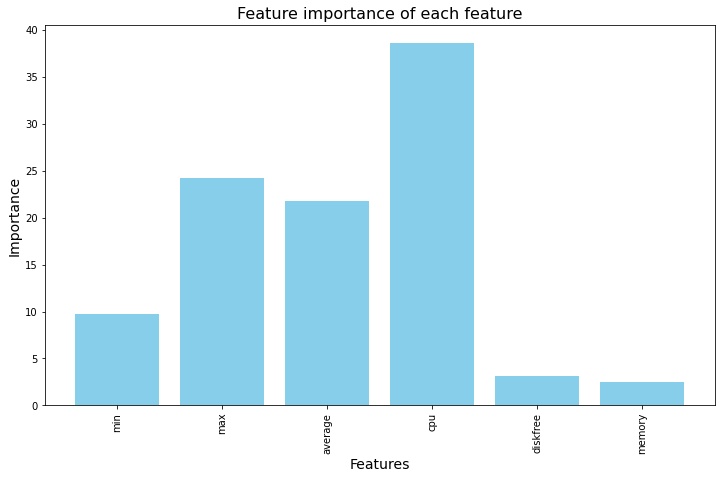

In [35]:
##Ploting the Feature importance of each feature
plt.figure(figsize=(12,7))
plt.bar(X_train.columns, model_rf.feature_importances_*100,color='skyblue')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Importance',fontsize=14)
plt.xticks(rotation=90)
plt.title('Feature importance of each feature',fontsize = 16)

## Hyperparameter tuning

In [36]:
param_grid = [{'n_estimators':[100,200,300],
              'max_depth' : [None,2,3,10,20],
              'max_features' : ['auto',2,4,8,16,'log2',None]}]
print(param_grid)

[{'n_estimators': [100, 200, 300], 'max_depth': [None, 2, 3, 10, 20], 'max_features': ['auto', 2, 4, 8, 16, 'log2', None]}]


In [37]:
temp_rf = RandomForestClassifier(random_state = 0,n_jobs = -1)

In [38]:
grid_search = GridSearchCV(estimator = temp_rf,param_grid=param_grid,scoring='roc_auc',cv=5,n_jobs=-1)

In [39]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid=[{'max_depth': [None, 2, 3, 10, 20],
                          'max_features': ['auto', 2, 4, 8, 16, 'log2', None],
                          'n_estimators': [100, 200, 300]}],
             scoring='roc_auc')

In [40]:
grid_search.best_score_

1.0

In [41]:
grid_search.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}

## Final Model

In [42]:
## Creating the final random forest model using grid_serch best estimator

final_rf = grid_search.best_estimator_

In [43]:
final_rf.fit(X_train,Y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [44]:
#Making prediction on the train set

y_train_pred = final_rf.predict(X_train)

In [45]:
#Making prediction on the test set

y_test_pred = final_rf.predict(X_test)

In [46]:
df_decision = pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_test_pred})

In [47]:
df_decision.head()

,Actual Value,Predicted Value
1517,1,1
220,0,0
703,1,1
156,0,0
1373,1,1


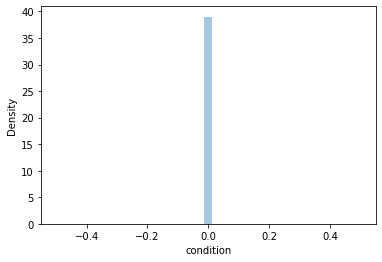

In [48]:
sns.distplot(Y_train-y_train_pred);

In [49]:
final_rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_features='auto', random_state=1537364731),
 DecisionTreeClassifier(max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_features='auto', random_state=1491434855),
 DecisionTreeClassifier(max_features='auto', random_state=1819583497),
 DecisionTreeClassifier(max_features='auto', random_state=530702035),
 DecisionTreeClassifier(max_features='auto', random_state=626610453),
 DecisionTreeClassifier(max_features='auto', random_state=1650906866),
 DecisionTreeClassifier(max_features='auto', random_state=1879422756),
 DecisionTreeClassifier(max_features='auto', random_state=1277901399),
 DecisionTree

In [50]:
len(final_rf.estimators_)


100

## visualization of RandomForestTree

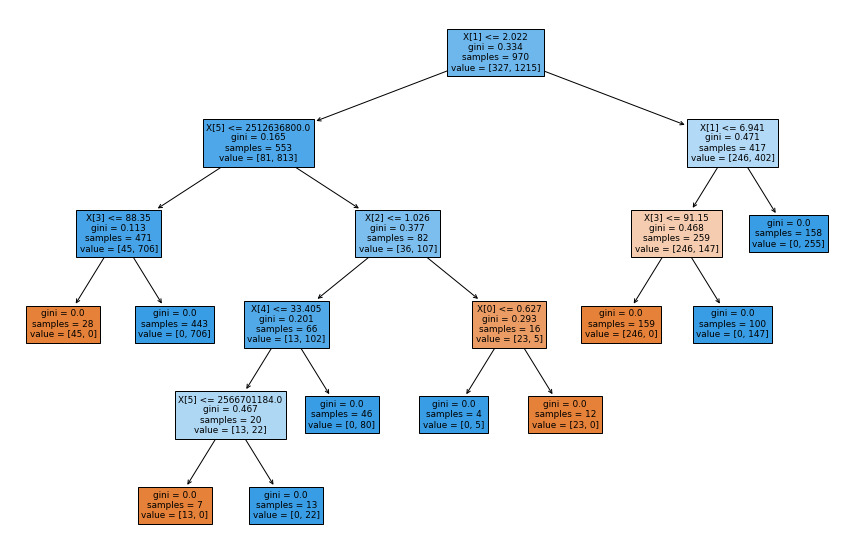

In [51]:
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(final_rf.estimators_[5],filled = True);

In [53]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("final_rf.pkl","wb")
pickle.dump(final_rf, pickle_out)
pickle_out.close()

In [ ]:
import time
import os
import joblib
from sklearn.ensemble import RandomForestClassifier
import numpy as np

last_modified_time = None

model = joblib.load("final_rf.pkl")

while True:
    modified_time = os.path.getmtime("file.csv")
    if last_modified_time != modified_time:
        last_modified_time = modified_time
        
        df = pd.read_csv("file.csv")
        new_data = df.tail(1)
        new_data = new_data.drop(['timestamp','app_name'],axis=1)
        predictions = model.predict(new_data)
        print("[NO ALEART/HIGH ALERT]:[0/1]")
        print("New Prediction of data:\n",predictions) 
        
    time.sleep(1)


        